In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
# Importar csv
df_comediantes = pd.read_csv('shows.csv', sep=',')
df_comediantes.head(13)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [37]:
# Transformar valores para números
df_comediantes['Nationality'] = df_comediantes['Nationality'].map({'UK': 0, 'USA': 1, 'N': 2})
df_comediantes['Go'] = df_comediantes['Go'].map({'YES': 1, 'NO': 0})
df_comediantes.head(13)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [38]:
atributos_nomes = ['Age', 'Experience', 'Rank', 'Nationality']
atributos = df_comediantes[atributos_nomes]
classes = df_comediantes['Go']

In [39]:
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos.values, classes.values)

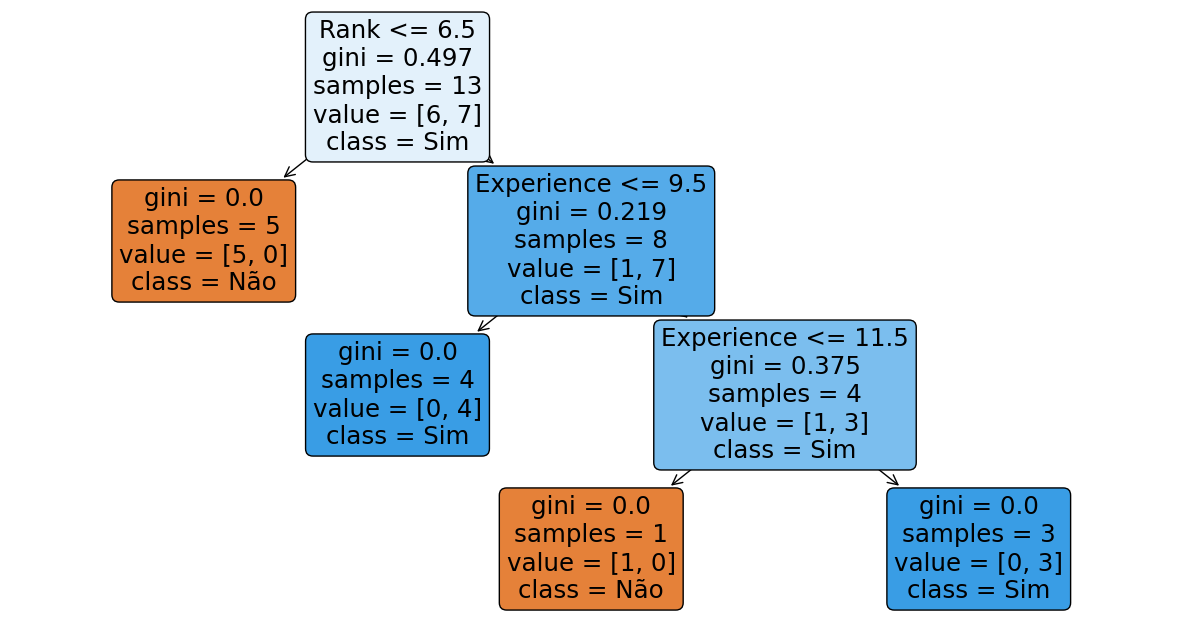

In [40]:
plt.figure(figsize=(15,8))
plot_tree(arvore, filled=True, rounded=True, class_names=['Não', 'Sim'], feature_names=atributos_nomes)
plt.show()

In [41]:
print(arvore.predict([[40, 10, 7, 1]]))

[0]


In [42]:
print(arvore.predict([[40, 13, 7, 1]]))

[1]


In [43]:
print(arvore.predict([[80, 30, 4, 0]]))

[0]


In [44]:
df_vinhos = pd.read_csv('winequality-red.csv', sep=';')
print('O dataframe tem {} linhas e {} colunas'.format(df_vinhos.shape[0], df_vinhos.shape[1]))
df_vinhos.head(10)

O dataframe tem 1599 linhas e 12 colunas


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [45]:
df_vinhos['quality'].sort_values().unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [46]:
vinhos_colunas = df_vinhos.columns[0:11].values.tolist()
vinhos_atributos = df_vinhos[vinhos_colunas]
vinhos_classes = df_vinhos['quality']

In [47]:
atributos_treino, atributos_teste, vinho_classes_treino, vinho_classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.1, random_state=10)

In [48]:
vinheira = DecisionTreeClassifier()
vinheira = vinheira.fit(atributos_treino, vinho_classes_treino)

In [49]:
vinhos_classes_predicao = vinheira.predict(atributos_teste)
acuracia = accuracy_score(vinho_classes_teste, vinhos_classes_predicao)
print('Acurácia de classificação: {}'.format(acuracia))

Acurácia de classificação: 0.59375


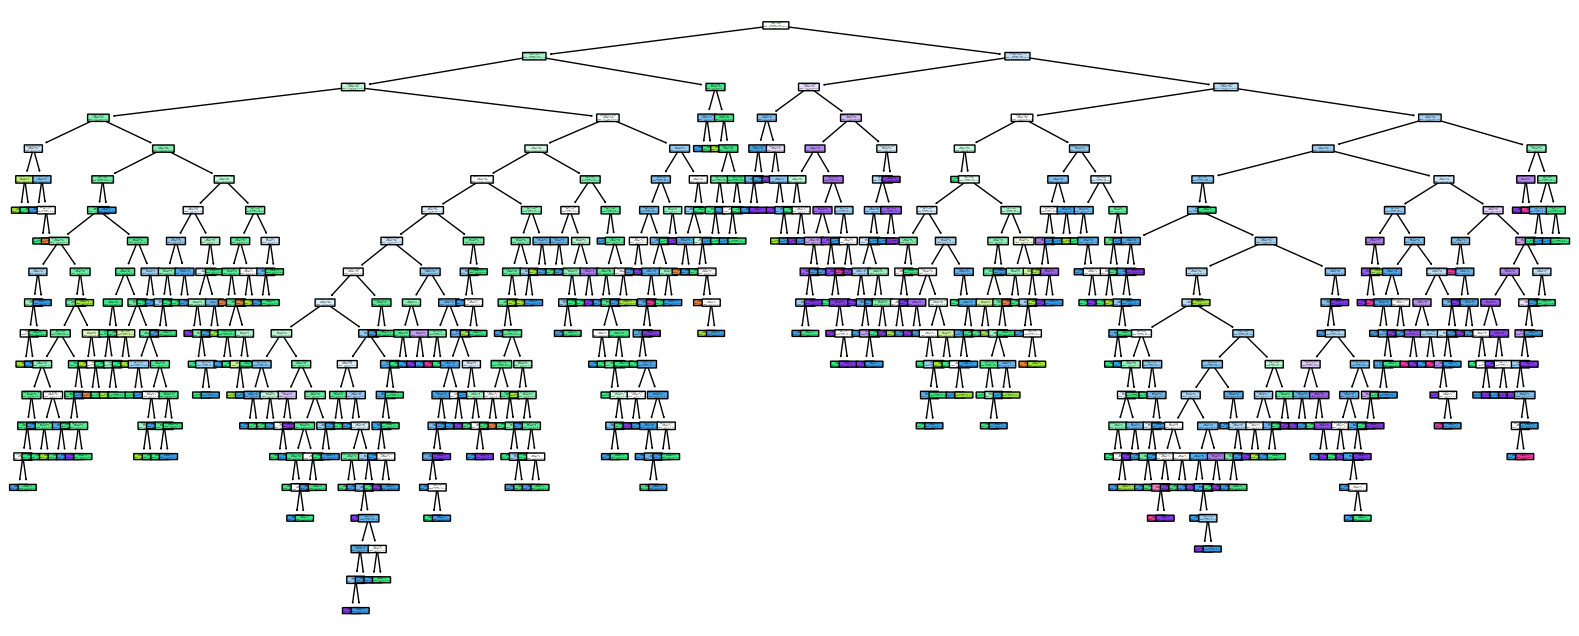

In [50]:
plt.figure(figsize=(20,8))
plot_tree(vinheira, filled=True, rounded=True, class_names=['3','4','5','6','7','8'], feature_names=vinhos_colunas)
plt.show()